
🚀 Running for: ETHEREUM
(2748, 8)
        Start         End       Open       High        Low      Close  \
0  2025-07-10  2025-07-11  2770.3479  2987.1587  2757.6031  2953.5281   
1  2025-07-09  2025-07-10  2612.5919  2784.4170  2591.7288  2768.7137   
2  2025-07-08  2025-07-09  2542.3094  2623.0745  2526.6110  2615.1445   
3  2025-07-07  2025-07-08  2570.5043  2584.7177  2519.3428  2542.8923   
4  2025-07-06  2025-07-07  2515.1621  2598.1006  2507.5415  2570.7454   

         Volume    Market Cap  
0  5.112265e+10  3.386875e+11  
1  3.410927e+10  3.207022e+11  
2  3.080219e+10  3.103528e+11  
3  2.822242e+10  3.084117e+11  
4  1.631597e+10  3.056866e+11  
1.0    2747
Name: count, dtype: int64
Missing values:
 Start         0
End           0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64
Duplicates: 0
📅 First day: 2018-01-01 00:00:00
🗓️ Last day: 2025-07-10 00:00:00
            priceClose        Volume    Market Cap
timeClo

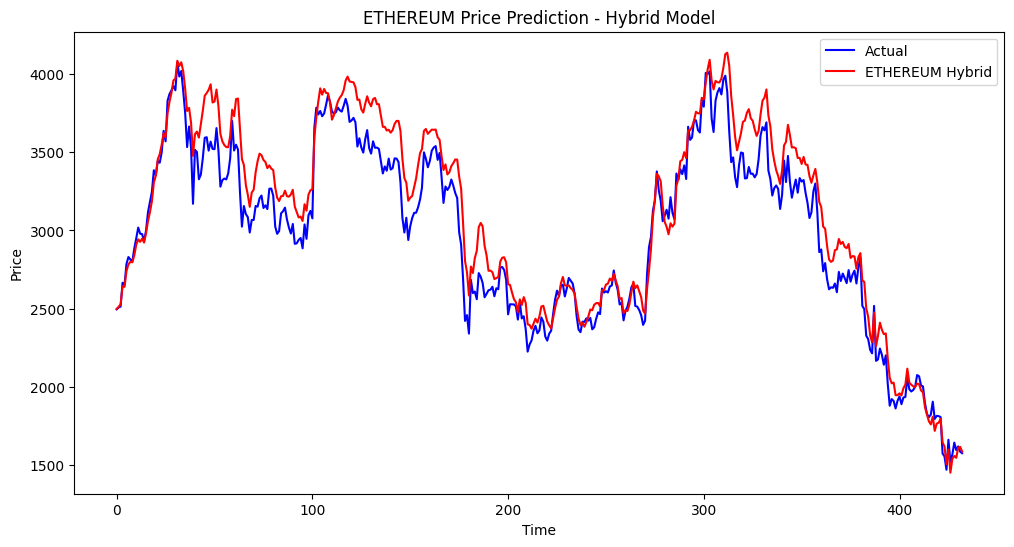


📈 Predicted Next Day Price for ETHEREUM: 2879.72


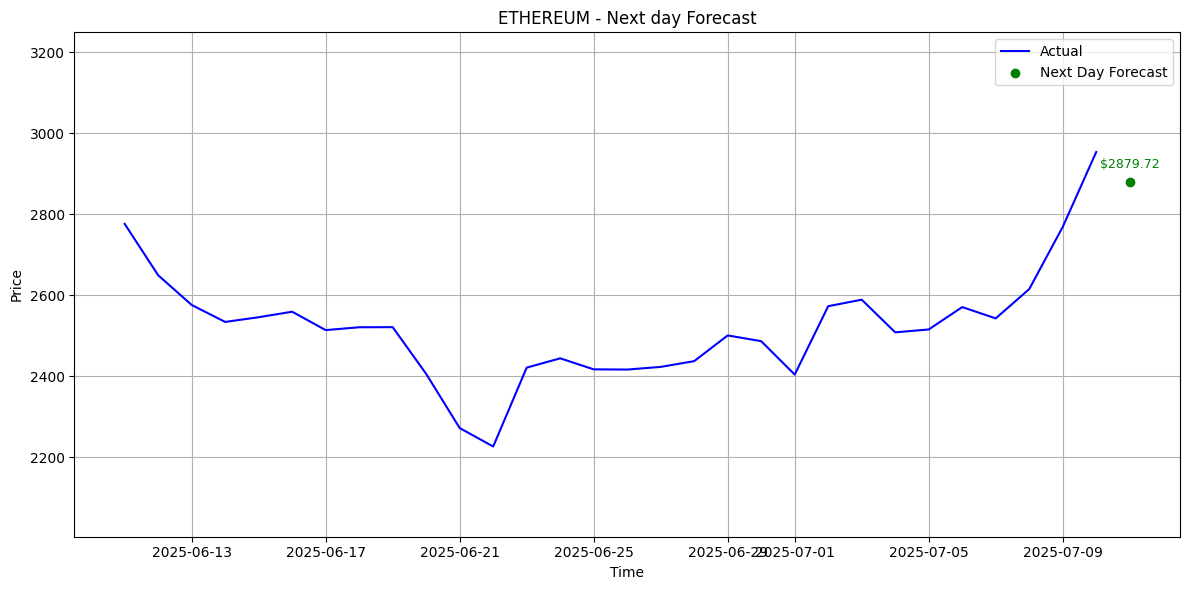


📅 Predicted Next 7 Days for ETHEREUM:
Day 1: 2879.72
Day 2: 2875.28
Day 3: 2873.95
Day 4: 2877.39
Day 5: 2867.31
Day 6: 2874.76
Day 7: 2870.98


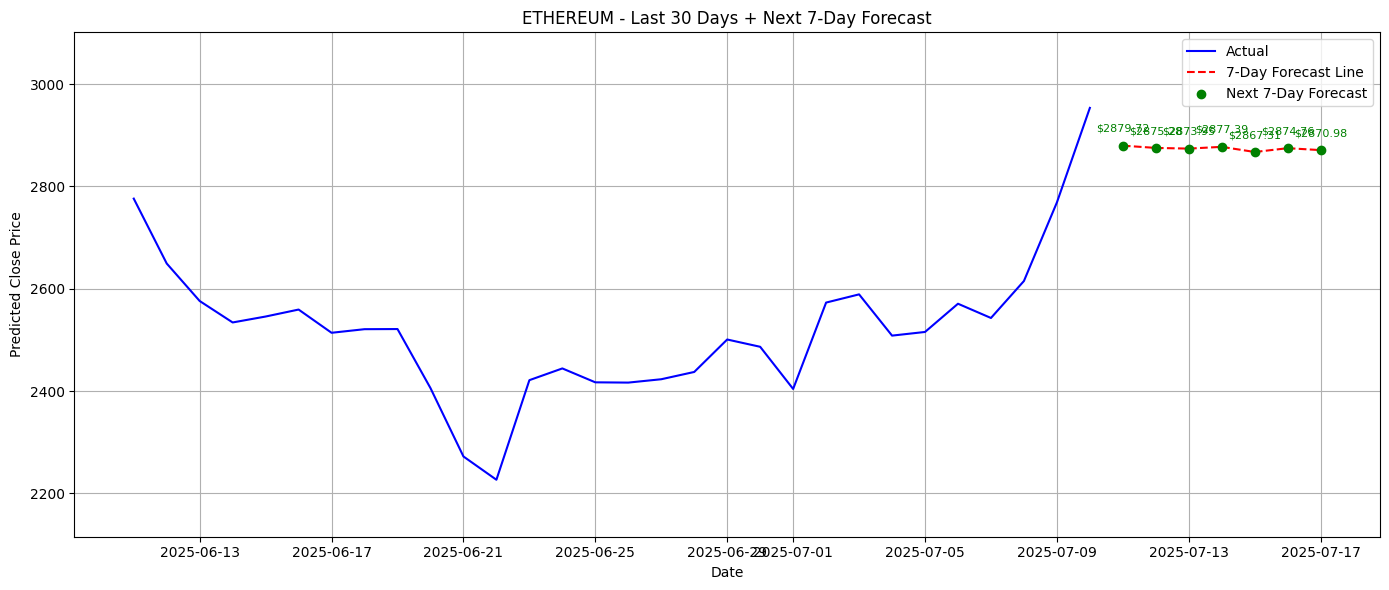

✅ Models for ETHEREUM saved!


🚀 Running for: BITCOIN
(2748, 8)
        Start         End      Open      High       Low     Close  \
0  2025-07-10  2025-07-11  111299.0  116548.0  110621.0  115977.0   
1  2025-07-09  2025-07-10  108865.0  111889.0  108352.0  111260.0   
2  2025-07-08  2025-07-09  108253.0  109148.0  107567.0  108947.0   
3  2025-07-07  2025-07-08  109173.0  109597.0  107540.0  108300.0   
4  2025-07-06  2025-07-07  108196.0  109500.0  107850.0  109240.0   

         Volume    Market Cap  
0  7.022274e+10  2.229995e+12  
1  4.285638e+10  2.175240e+12  
2  4.535438e+10  2.157956e+12  
3  3.962956e+10  2.159835e+12  
4  2.149597e+10  2.156392e+12  
1.0    2747
Name: count, dtype: int64
Missing values:
 Start         0
End           0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64
Duplicates: 0
📅 First day: 2018-01-01 00:00:00
🗓️ Last day: 2025-07-10 00:00:00
              priceClose        Volume    Market Cap


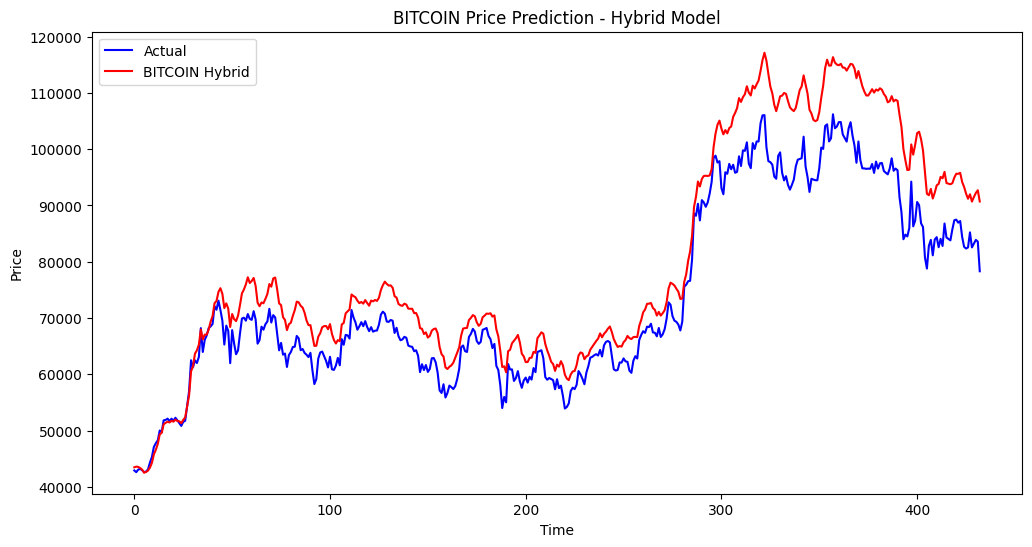


📈 Predicted Next Day Price for BITCOIN: 127959.27


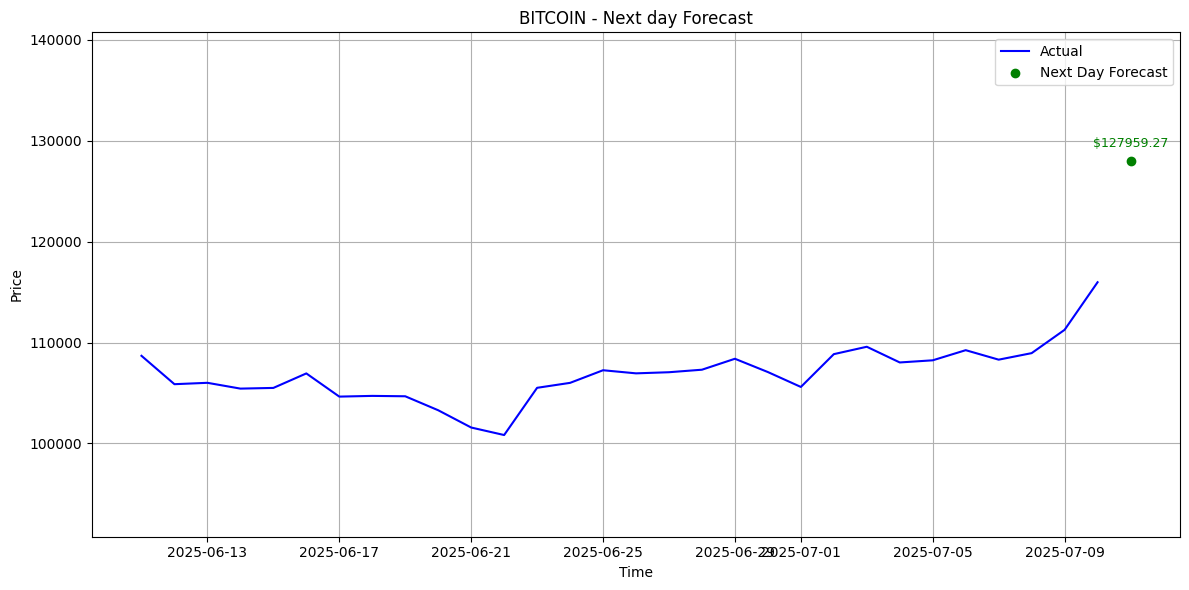


📅 Predicted Next 7 Days for BITCOIN:
Day 1: 127959.27
Day 2: 127296.75
Day 3: 127937.52
Day 4: 127624.75
Day 5: 127870.32
Day 6: 127806.66
Day 7: 128004.76


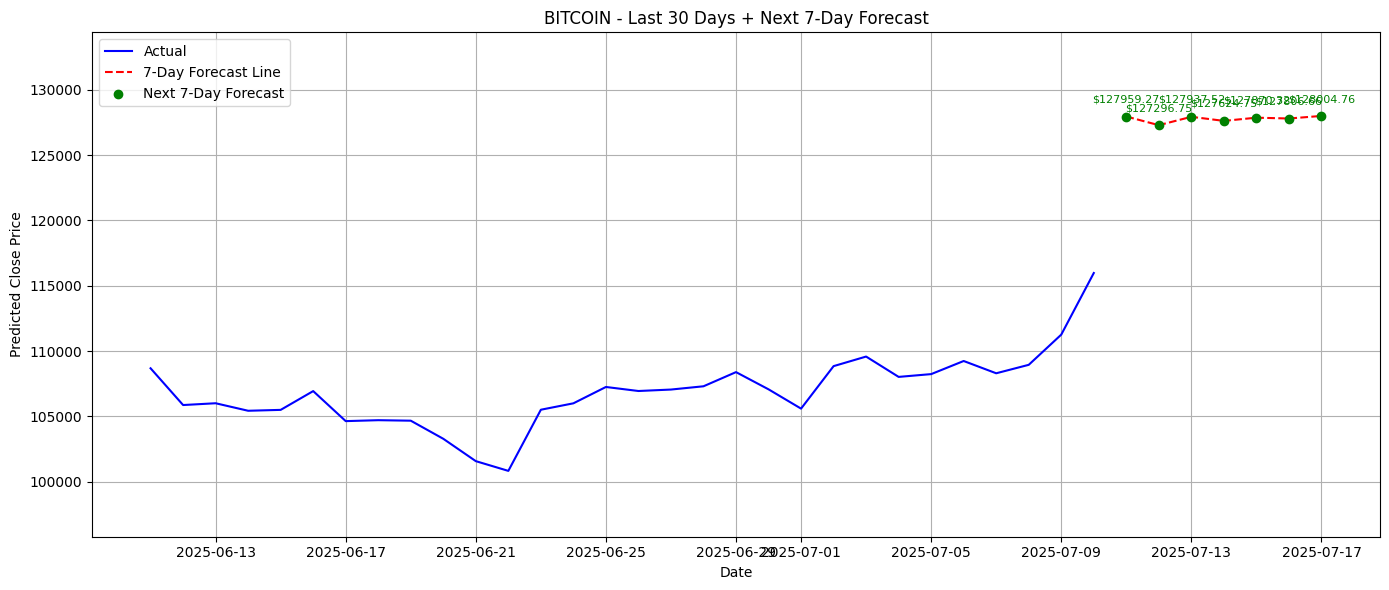

✅ Models for BITCOIN saved!


🚀 Running for: XRP
(2748, 8)
        Start         End      Open      High       Low     Close  \
0  2025-07-10  2025-07-11  2.405582  2.553908  2.395266  2.543181   
1  2025-07-09  2025-07-10  2.306806  2.422657  2.298698  2.401116   
2  2025-07-08  2025-07-09  2.269644  2.318669  2.249607  2.309338   
3  2025-07-07  2025-07-08  2.270903  2.345561  2.258551  2.274261   
4  2025-07-06  2025-07-07  2.216362  2.285205  2.210808  2.272174   

         Volume    Market Cap  
0  9.008427e+09  1.450085e+11  
1  6.266187e+09  1.391927e+11  
2  7.126771e+09  1.349816e+11  
3  5.436874e+09  1.348551e+11  
4  3.076900e+09  1.329517e+11  
1.0    2747
Name: count, dtype: int64
Missing values:
 Start         0
End           0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64
Duplicates: 0
📅 First day: 2018-01-01 00:00:00
🗓️ Last day: 2025-07-10 00:00:00
            priceClose        Volume    Market Cap
timeClo

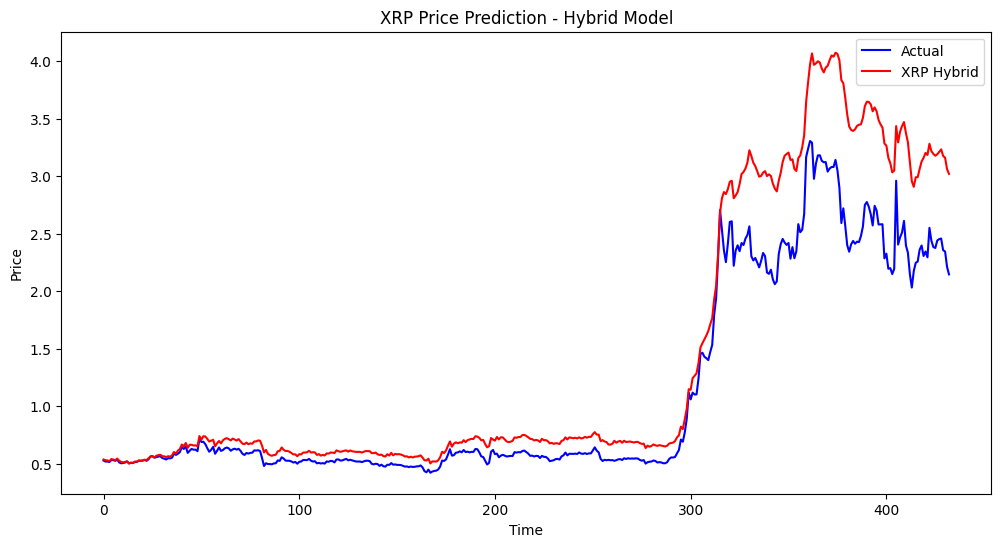


📈 Predicted Next Day Price for XRP: 2.98


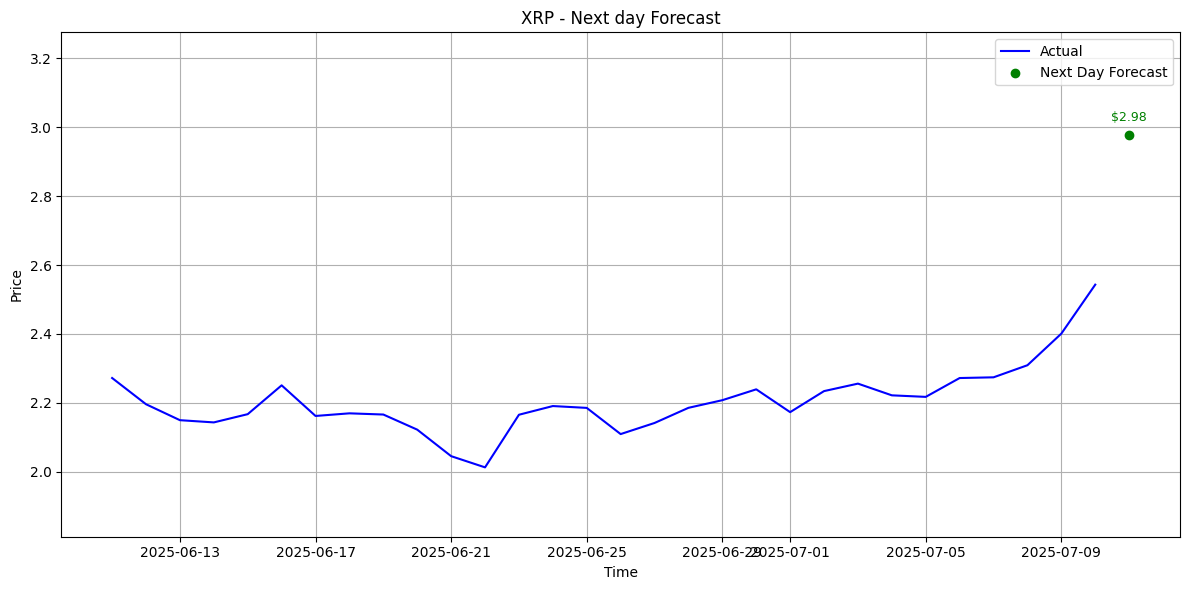


📅 Predicted Next 7 Days for XRP:
Day 1: 2.98
Day 2: 2.95
Day 3: 2.96
Day 4: 2.97
Day 5: 2.97
Day 6: 2.97
Day 7: 2.98


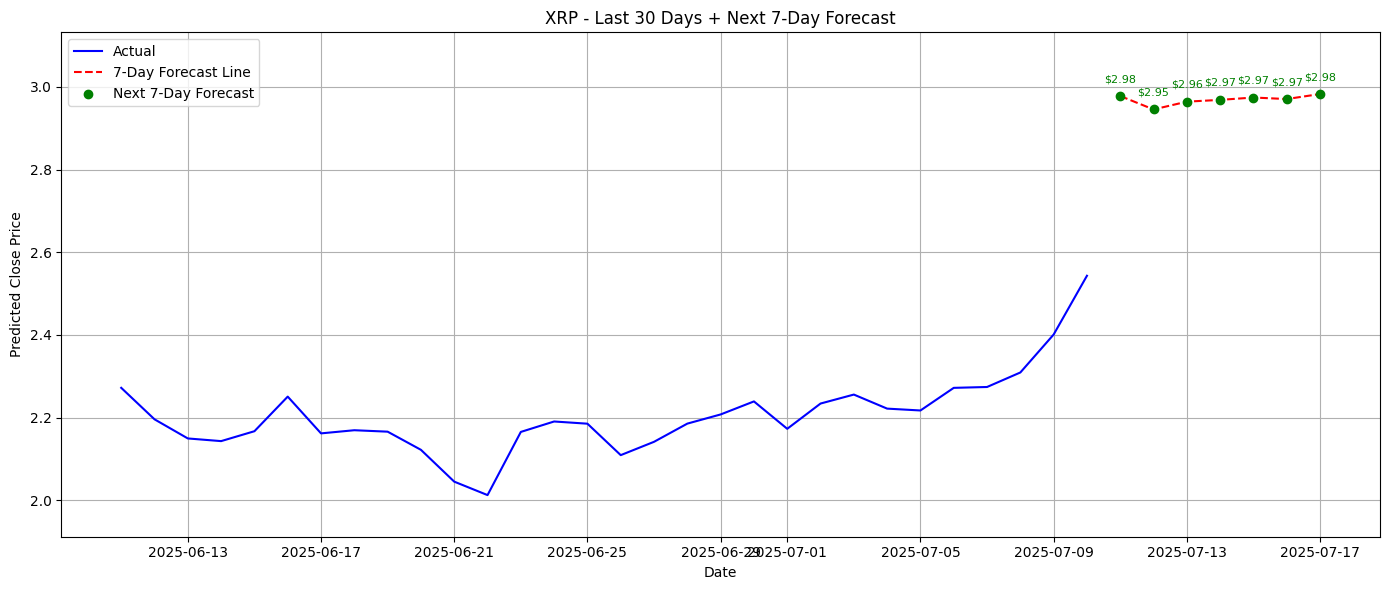

✅ Models for XRP saved!



In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, Input, Layer
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import register_keras_serializable
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

# 👉 1️⃣ Attention Layer
@register_keras_serializable()
class Attention(Layer):
    def __init__(self, **kwargs):
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1), initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1), initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        return tf.keras.backend.sum(output, axis=1)

# 👉 2️⃣ Utility: ADF order
def get_diff_order(series):
    result = adfuller(series)
    return 0 if result[1] < 0.05 else 1

# 👉 3️⃣ Sequences
def create_sequences(data, seq_length=30):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(x), np.array(y)

def create_lagged_features(series, lag=30):
    X, y = [], []
    for i in range(lag, len(series)):
        X.append(series[i-lag:i])
        y.append(series[i])
    return np.array(X), np.array(y)

# 👉 4️⃣ Run one coin
def run_pipeline(coin_name, file_name):
    print(f"\n🚀 Running for: {coin_name.upper()}")
    data_record = pd.read_csv(file_name)

    print(data_record.shape)
    print(data_record.head())
    print(data_record.index.to_series().diff().value_counts())

    print("Missing values:\n", data_record.isnull().sum())
    print("Duplicates:", data_record.duplicated().sum())

    data_record['timeClose'] = pd.to_datetime(data_record['Start'])
    data_record['priceClose'] = data_record['Close']
    data_record = data_record.sort_values(by='timeClose')
    data_record = data_record[['timeClose', 'priceClose', 'Volume', 'Market Cap']].drop_duplicates().dropna()
    data_record.set_index('timeClose', inplace=True)
    print("📅 First day:", data_record.index.min())
    print("🗓️ Last day:", data_record.index.max())
    print(data_record.head())

    data_record['SMA_10'] = data_record['priceClose'].rolling(10).mean()
    data_record['EMA_10'] = data_record['priceClose'].ewm(span=10).mean()
    data_record['priceChange'] = data_record['priceClose'].pct_change()
    data_record.dropna(inplace=True)

    print(data_record.head())

    # Period summaries
    df = data_record.copy().reset_index()
    df['Year'] = df['timeClose'].dt.year
    df['Month'] = df['timeClose'].dt.to_period('M')
    df['Quarter'] = df['timeClose'].dt.to_period('Q')
    print("\n📆 Monthly:\n", df.groupby('Month')['priceClose'].agg(['min', 'max', 'mean', 'last']).tail())
    print("\n📣 Quarterly:\n", df.groupby('Quarter')['priceClose'].agg(['min', 'max', 'mean', 'last']).tail())
    print("\n📅 Yearly:\n", df.groupby('Year')['priceClose'].agg(['min', 'max', 'mean', 'last']).tail())

    train_size = int(len(data_record) * 0.8)
    train_data = data_record.iloc[:train_size]
    test_data = data_record.iloc[train_size:]

    endog = train_data['priceClose']
    exog = train_data[['SMA_10', 'EMA_10', 'priceChange']]
    exog_test = test_data[['SMA_10', 'EMA_10', 'priceChange']]

    d = get_diff_order(endog)
    best_aic = float("inf")
    best_model = None
    seasonal_period = 7

    for p in range(3):
        for q in range(3):
            for P in range(2):
                for Q in range(2):
                    try:
                        model = SARIMAX(endog, exog=exog, order=(p, d, q),
                                        seasonal_order=(P, d, Q, seasonal_period),
                                        enforce_stationarity=False, enforce_invertibility=False)
                        results = model.fit(disp=False)
                        if results.aic < best_aic:
                            best_model = results
                            best_aic = results.aic
                    except:
                        continue

    sarimax_fit = best_model
    forecast = sarimax_fit.get_forecast(steps=len(exog_test), exog=exog_test)
    sarimax_preds = forecast.predicted_mean

    residuals = train_data['priceClose'] - sarimax_fit.fittedvalues
    residuals.dropna(inplace=True)
    residual_mean, residual_std = residuals.mean(), residuals.std()
    residual_threshold = residual_mean + 3 * residual_std
    print(f"📌 Residual threshold: {residual_threshold:.2f}")

    scaler = StandardScaler()
    residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))
    seq_length_map = {
        'ethereum': 30,
        'bitcoin': 20,
        'xrp': 12
    }
    seq_length = seq_length_map[coin_name.lower()]
    x_res, y_res = create_sequences(residuals_scaled, seq_length)
    split = int(len(x_res) * 0.8)
    x_train_lstm, x_test_lstm = x_res[:split], x_res[split:]
    y_train_lstm, y_test_lstm = y_res[:split], y_res[split:]

    # LSTM + Attention
    inputs = Input(shape=(seq_length, 1))
    x = Bidirectional(LSTM(64, return_sequences=True, activation='relu', kernel_regularizer=l2(0.01)))(inputs)
    x = Dropout(0.2)(x)
    x = Attention()(x)
    x = Dense(1)(x)
    model = Model(inputs, x)
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(x_train_lstm, y_train_lstm, validation_data=(x_test_lstm, y_test_lstm),
              epochs=100, batch_size=32,
              callbacks=[EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)])

    lstm_preds = model.predict(x_test_lstm)
    lstm_preds_inv = scaler.inverse_transform(lstm_preds).flatten()

    X_xgb, y_xgb = create_lagged_features(residuals_scaled.flatten(), lag=30)
    split = int(len(X_xgb) * 0.8)
    x_train_xgb, x_test_xgb = X_xgb[:split], X_xgb[split:]
    y_train_xgb, y_test_xgb = y_xgb[:split], y_xgb[split:]
    xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, objective='reg:squarederror')
    xgb_model.fit(x_train_xgb, y_train_xgb)
    xgb_preds = xgb_model.predict(x_test_xgb)
    xgb_preds_inv = scaler.inverse_transform(xgb_preds.reshape(-1, 1)).flatten()

    min_len = min(len(sarimax_preds) - seq_length, len(lstm_preds_inv), len(xgb_preds_inv))
    arima_adj = sarimax_preds[seq_length:seq_length + min_len]
    lstm_preds_inv = lstm_preds_inv[:min_len]
    xgb_preds_inv = xgb_preds_inv[:min_len]
    actual = test_data['priceClose'].iloc[seq_length:seq_length + min_len]

    test_residuals = actual.values - arima_adj.values
    anomaly_flags = np.abs(test_residuals) > np.abs(residual_threshold)
    print(f"⚡ Anomalies detected: {np.sum(anomaly_flags)}")

    hybrid_preds = []
    for i in range(min_len):
        if anomaly_flags[i]:
            final = arima_adj.iloc[i] + 1.5 * ((lstm_preds_inv[i] + xgb_preds_inv[i]) / 2)
        else:
            final = arima_adj.iloc[i] + ((lstm_preds_inv[i] + xgb_preds_inv[i]) / 2)
        hybrid_preds.append(final)
    hybrid_preds = np.array(hybrid_preds)

    rmse = np.sqrt(mean_squared_error(actual, hybrid_preds))
    mae = mean_absolute_error(actual, hybrid_preds)
    mape = np.mean(np.abs((actual - hybrid_preds) / actual)) * 100
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%")

    plt.figure(figsize=(12, 6))
    plt.plot(actual.values, label="Actual", color="blue")
    plt.plot(hybrid_preds, label=f"{coin_name.upper()} Hybrid", color="red")
    plt.title(f"{coin_name.upper()} Price Prediction - Hybrid Model")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.show()
    
    # Price predictions for next day and next 7 days ------------
    
    # --- Next day prediction ---
    def predict_next_day():
        last_row = data_record.iloc[-1]
        next_exog = pd.DataFrame([{
            'SMA_10': last_row['SMA_10'],
            'EMA_10': last_row['EMA_10'],
            'priceChange': last_row['priceChange']
        }])

        next_arima = sarimax_fit.get_forecast(steps=1, exog=next_exog).predicted_mean.iloc[0]

        last_lstm_seq = residuals_scaled[-seq_length:].reshape(1, seq_length, 1)
        next_lstm_resid = model.predict(last_lstm_seq, verbose=0)
        next_lstm_resid_inv = scaler.inverse_transform(next_lstm_resid)[0, 0]

        last_xgb_input = residuals_scaled[-30:].flatten().reshape(1, -1)
        next_xgb_resid = xgb_model.predict(last_xgb_input)
        next_xgb_resid_inv = scaler.inverse_transform(next_xgb_resid.reshape(-1, 1))[0, 0]

        final_next = next_arima + (next_lstm_resid_inv + next_xgb_resid_inv) / 2
        return final_next

    # --- Next 7 days prediction ---
    def predict_next_n_days(n=7):
        future_preds = []
        temp_residuals = residuals_scaled.copy()
        last_known_price = data_record['priceClose'].iloc[-1]

        for i in range(n):
            last_row = data_record.iloc[-1]
            next_exog = pd.DataFrame([{
                'SMA_10': last_row['SMA_10'],
                'EMA_10': last_row['EMA_10'],
                'priceChange': last_row['priceChange']
            }])

            next_arima = sarimax_fit.get_forecast(steps=1, exog=next_exog).predicted_mean.iloc[0]

            lstm_input = temp_residuals[-seq_length:].reshape(1, seq_length, 1)
            lstm_resid = model.predict(lstm_input, verbose=0)
            lstm_resid_inv = scaler.inverse_transform(lstm_resid)[0, 0]

            xgb_input = temp_residuals[-30:].reshape(1, -1)
            xgb_resid = xgb_model.predict(xgb_input)
            xgb_resid_inv = scaler.inverse_transform(xgb_resid.reshape(-1, 1))[0, 0]

            hybrid_price = next_arima + (lstm_resid_inv + xgb_resid_inv) / 2
            future_preds.append(hybrid_price)

            simulated_resid = hybrid_price - last_known_price
            last_known_price = hybrid_price
            new_scaled_resid = scaler.transform([[simulated_resid]])
            temp_residuals = np.append(temp_residuals, new_scaled_resid)[-len(temp_residuals):]
            

        return future_preds
    
       
    
    # Call them
    next_price = predict_next_day()
    print(f"\n📈 Predicted Next Day Price for {coin_name.upper()}: {next_price:.2f}")
    
    # --- Step 16 (Final): Plot including Next Day Prediction (Zoomed to Last 30 Days) ---

    # Define number of days to show (30 actual days + next day forecast)
    days_to_show = 30

    # Get last date in dataset and calculate next day
    last_timestamp = data_record.index.max()
    next_timestamp = last_timestamp + pd.Timedelta(days=1)

    # Get last 30 days of data
    recent_index = data_record.index[-days_to_show:]
    recent_actual = data_record['priceClose'][-days_to_show:]
    recent_preds = hybrid_preds[-days_to_show:]

    # Extend hybrid predictions with next day price
    hybrid_preds_extended = np.append(recent_preds, next_price)
    time_extended = recent_index.to_list() + [next_timestamp]
    actual_extended = np.append(recent_actual.values, np.nan)

    # Define Y-axis limits
    y_min = min(recent_actual.min(), next_price) * 0.9
    y_max = max(recent_actual.max(), next_price) * 1.1

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(recent_index, recent_actual, label="Actual", color="blue")
    plt.scatter(next_timestamp, next_price, color="green", label="Next Day Forecast", zorder=5)

    # Annotate predicted price
    plt.annotate(f"${next_price:.2f}",
                 (next_timestamp, next_price),
                 textcoords="offset points",
                 xytext=(0, 10),
                 ha='center', fontsize=9, color='green')

    # Configure axes and labels
    plt.ylim([y_min, y_max])
    plt.title(f"{coin_name.upper()} - Next day Forecast")
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    

    next_7 = predict_next_n_days(7)
    print(f"\n📅 Predicted Next 7 Days for {coin_name.upper()}:")
    for idx, val in enumerate(next_7, 1):
        print(f"Day {idx}: {val:.2f}")

    # Plot next 7 days values
    days_to_show = 30  # show last 30 actual days

    last_timestamp = data_record.index.max()
    next_7_timestamps = [last_timestamp + pd.Timedelta(days=i) for i in range(1, 8)]

    # Use last 30 days of actual
    recent_index = data_record.index[-days_to_show:]
    recent_actual = data_record['priceClose'][-days_to_show:]
    recent_preds = hybrid_preds[-days_to_show:]

    y_min = min(min(recent_actual), min(next_7)) * 0.95
    y_max = max(max(recent_actual), max(next_7)) * 1.05

    plt.figure(figsize=(14, 6))
    plt.plot(recent_index, recent_actual, label="Actual", color="blue")
    plt.plot(next_7_timestamps, next_7, 'r--', label="7-Day Forecast Line")
    plt.scatter(next_7_timestamps, next_7, color="green", label="Next 7-Day Forecast", zorder=5)

    for x, y in zip(next_7_timestamps, next_7):
        plt.annotate(f"${y:.2f}", (x, y), textcoords="offset points",
                     xytext=(0, 10), ha='center', fontsize=8, color="green")

    plt.title(f"{coin_name.upper()} - Last 30 Days + Next 7-Day Forecast")
    plt.xlabel("Date")
    plt.ylabel("Predicted Close Price")
    plt.ylim([y_min, y_max])
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Save
    os.makedirs(f"saved_models/{coin_name}", exist_ok=True)
    with open(f"saved_models/{coin_name}/sarimax_model.pkl", "wb") as f:
        pickle.dump(sarimax_fit, f)
    model.save(f"saved_models/{coin_name}/lstm_model.keras")
    xgb_model.save_model(f"saved_models/{coin_name}/xgb_model.json")
    with open(f"saved_models/{coin_name}/residual_scaler.pkl", "wb") as f:
        pickle.dump(scaler, f)

    print(f"✅ Models for {coin_name.upper()} saved!\n")

# 👉 5️⃣ Run for all coins
run_pipeline('ethereum', 'Ethereum Historical Data 2018-2025.csv')
run_pipeline('bitcoin', 'Bitcoin Historical Data 2018-2025.csv')
run_pipeline('xrp', 'XRP Historical Data 2018-2025.csv')